<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

*Research location data to find the city targets.*

In [2]:
import pandas as pd
import seaborn as sns

%matplotlib inline

project_id = "big-query-dsi-ty"

sql_1 = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.reviews] 
LIMIT 10000
"""

sql_2 = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.businesses] 
LIMIT 10000
"""

sql_3 = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.tips] 
LIMIT 10000
"""

sql_4="""
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.users] 
LIMIT 40000

"""



df_reviews = pd.read_gbq(sql_1, project_id=project_id)

df_business = pd.read_gbq(sql_2, project_id=project_id)

df_tips =  pd.read_gbq(sql_3, project_id=project_id)

df_users=pd.read_gbq(sql_4, project_id=project_id)


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 1; 32.0% done. Elapsed 8.22 s.
  Got page: 2; 65.0% done. Elapsed 12.93 s.
  Got page: 3; 97.0% done. Elapsed 17.66 s.
  Got page: 4; 100.0% done. Elapsed 19.56 s.
Got 10000 rows.

Total time taken 22.27 s.
Finished at 2016-12-20 00:49:07.
Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 10000 rows.

Total time taken 5.04 s.
Finished at 2016-12-20 00:49:12.
Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 67.0% done. Elapsed 11.63 s.
  Got page: 3; 100.0% done. Elapsed 17.88 s.
Got 10000 rows.

Total time taken 20.54 s.
Finished at 2016-12-20 00:49:33.
Requesting query... ok.
Query running...
Query done.
Processed: 15.2 Mb

Retrieving results...
  Got page: 1; 42.0% done. Elapsed 8.1 s.
  Got page: 2; 83.0% done. Elapsed 12.64 s.
  Got page: 3; 100.0% done. Elapsed 14.95 s.
Got 40000 rows.

Tota

In [18]:
#Imports table
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm
import numpy as np

In [19]:
#Take the businessid and city from the business table to find the cities in the reviews dataframe


X=df_business[["business_id", "city"]]
df_review_merged = df_reviews.merge(X, on="business_id", how='inner')


In [20]:
#See all the unique cities in my array
df_reviews.head()

,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,minutes_10,minutes_15,...,service_great,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff
0,fPHLPrymsyb6WSFFKoMrTQ,3vX3VkmLV1SGSFEwzJbCqg,1,t1sCvl0nSbWeRj0ZgsolRA,2,4,2010-12-07,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tbItoBqYw5ANjrRVsyWCdA,6rV3DZKmIRcTVpKJbCZCBg,0,4bEjOyTaDG24SY5TxsaUNQ,0,4,2010-03-29,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6eEfoYQRwlrLcsBVWxeCfg,rGxZ4Uq8ihaCHT28LziNMw,0,4bEjOyTaDG24SY5TxsaUNQ,1,4,2013-04-14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,KQGdMxKtRtIVs1WGRkA1VQ,Puaz1nM7Jlq8GrY4DBt3-g,1,4bEjOyTaDG24SY5TxsaUNQ,1,4,2013-09-07,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,H1bnxc4KqxQ0RNtn8kyS1A,bg9TTcGaV992e1GUG32law,0,4bEjOyTaDG24SY5TxsaUNQ,0,4,2013-09-30,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Create a dummy variable for Las Vegas on my city column
df_review_merged["city"] = df_review_merged["city"].map(lambda x: 1 if x=="Las Vegas" else 0)

In [22]:
#Get our X and y variables and Perform logistic regression

X=df_review_merged.iloc[:,4:-1]
X= X.drop(["date"], axis=1)
X=X.drop(["las_vegas"], axis=1)
X=X.drop(["time_vegas"], axis=1)
y=df_review_merged.city.values

#Perform Regresssion 

logreg= LogisticRegression()
logreg.fit(X,y)


print 'Logreg intercept:', logreg.intercept_
print 'Logreg coef(s):', logreg.coef_
print 'Logreg predicted probabilities:', logreg.predict_proba

Logreg intercept: [-2.53242199]
Logreg coef(s): [[-0.22029751  0.25055595  0.16217026 -2.47530095  1.96029671 -3.12964515
  -0.85061581 -3.07574091 -7.18506649 -0.63868367 -2.49569358  4.87603309
  -1.85826418  0.79576579 -1.88853254 -4.0766238  -6.40627337 -1.69293922
  -2.68129636 -0.53577928 -2.79919412 -0.90216222 -1.71410712 -2.34795228
   0.42251374  0.16157136  0.98851406 -2.90457207  0.48690534 -1.3040849
   0.78870594 -5.02783305 -1.001867   -0.13242691 -0.23968166  1.21857449
  -1.83756564  0.2072444  -1.30224583  0.9713046   0.70830542 -0.62146697
  -3.41152374  3.48339089  0.10013544  0.11125025 -2.81344536  0.18435492
  -1.72971143  0.12529816 -1.94552435  0.45844944 -1.86417069 -1.17620765
   4.72264822 -0.2977214  -1.72802435 -2.72429754  1.49064291 -0.35848092
  -1.54846326 -2.42915962  4.05826761  0.90914779 -2.34728466 -0.23128662
   4.03352939  0.34078994  2.65893855  1.23219423 -1.3640267  -1.09548927
   3.16902655 -2.16848511 -2.92618117 -0.94487181 -3.00998795  0.

In [23]:
coefs_vars = pd.DataFrame({
        'coef':logreg.coef_[0],
        'variable':X.columns,
        'abscoef':np.abs(logreg.coef_[0])
    })
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars[coefs_vars.coef != 0]


,abscoef,coef,variable
8,7.185066,-7.185066,beer_selection
16,6.406273,-6.406273,definitely_come
31,5.027833,-5.027833,food_good
11,4.876033,4.876033,bottle_service
54,4.722648,4.722648,hip_hop
83,4.683531,4.683531,recommend_place
87,4.276574,-4.276574,second_time
15,4.076624,-4.076624,decided_try
62,4.058268,4.058268,long_time
66,4.033529,4.033529,mac_cheese


In [24]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, stratify=y )
model =logreg.fit(X_train,y_train)
predictions=logreg.predict(X_test)
predictions.mean()

0.047247119078104992

In [26]:
print y.shape, X.shape

(23665,) (23665, 101)


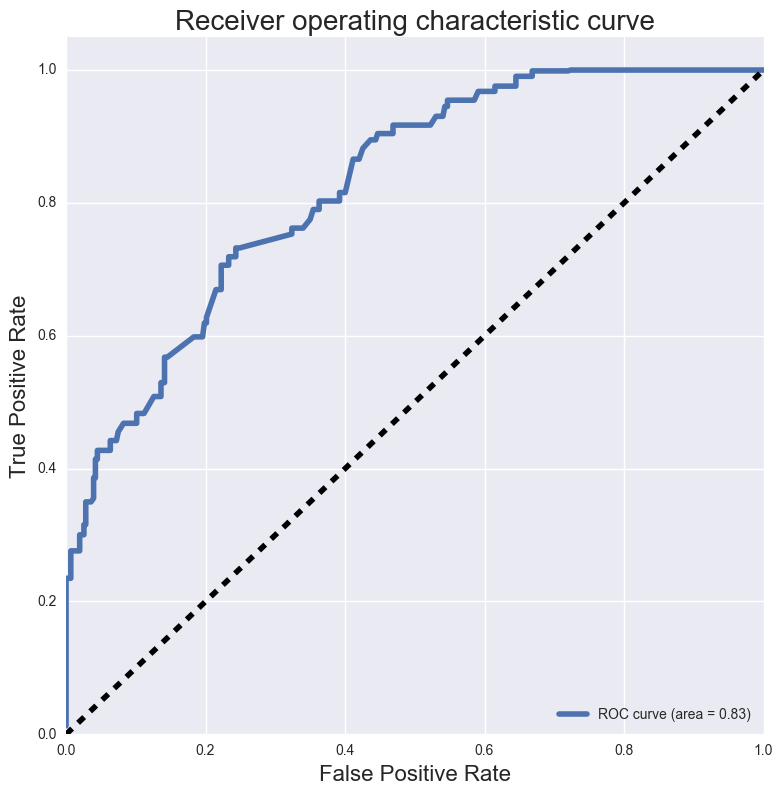

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get out the predicted probabilities for the X observation matrix
y_pp = logreg.predict_proba(X)

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [28]:
#KNN neighbors grid search between 1-100 neighbors, and choosing between uniform and distnce
#to find the best model to predict Las Vegas

In [14]:
#Going to try to use a KNN Neighbors classifier model to predict LasVegas
#Set up my parameters for gridsearch to use

params={
    "n_neighbors": range(60,100,2),
    "weights":['uniform','distance']
    
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn,params, cv=8, verbose=2)
knn_gs.fit(X,y)

Fitting 8 folds for each of 40 candidates, totalling 320 fits
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   2.0s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   1.8s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   1.9s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   1.9s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   2.3s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   1.9s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ..........

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:  1.3min


[CV] ....................... n_neighbors=64, weights=distance -   2.0s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   1.8s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   1.9s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   1.9s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   2.3s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   1.9s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   2.2s
[CV] n_neighbors=64, weights=distance ................................
[CV] .

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  5.4min


[CV] ........................ n_neighbors=80, weights=uniform -   1.8s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   1.9s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   2.0s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   2.3s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   2.0s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   2.2s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   1.9s
[CV] n_neighbors=80, weights=distance ................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 11.3min finished


GridSearchCV(cv=8, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [29]:
baseline = 1.0 - np.mean(y)
baseline

0.83431227551235998

In [30]:
print knn_gs.best_score_
print knn_gs.best_params_

0.750052820621
{'n_neighbors': 92, 'weights': 'distance'}


In [ ]:
coecoefs_vars.variable


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [31]:
#Pulling out service and non-service columns
y=df_reviews.stars.values

In [32]:
#Service Column
X_service = df_reviews[["bottle_service","customer_service","food_service","friendly_staff","good_service",
"great_service","minutes_later","service_excellent","service_food","service_friendly",
"super_friendly","wait_staff","votes_cool", "votes_funny","votes_useful"]]

In [33]:
#Non-service column
X_non_service=df_reviews[[col for col in df_reviews.columns if not col in ["bottle_service","customer_service",
"food_service","friendly_staff","good_service",
"great_service","minutes_later","service_excellent","service_food","service_friendly",
"super_friendly","wait_staff","user_id","review_id","business_id","date"]]]

In [34]:
lr = LinearRegression()

search_params = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}

In [126]:
lr_gs = GridSearchCV(lr, search_params, cv=10, verbose=2)
lr_gs.fit(X_service, y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.0s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.0s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.0s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.0s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.0s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.0s
[CV] normalize=False, fit_intercept=True .............................
[CV] ...........

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [False, True], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [127]:
#Regression Results for Service Columns
#Completly useless model. Service has 0 effect or im unable to model it properly

print lr_gs.best_score_
print lr_gs.best_params_



-3.11653361357
{'normalize': False, 'fit_intercept': True}


In [128]:
#Regression for Non-service columns
#Grid search, logistic regression

lr_gs = GridSearchCV(lr, search_params, cv=10, verbose=2)
lr_gs.fit(X_non_service, y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.1s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.1s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.1s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.1s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.1s
[CV] normalize=False, fit_intercept=True .............................
[CV] .................... normalize=False, fit_intercept=True -   0.1s
[CV] normalize=False, fit_intercept=True .............................
[CV] ...........

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [False, True], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [131]:
#Non-service seems to be a better predictor of ratings so the conclusion that could be 
#made could be that it is possible that 2 different ratings. M

print lr_gs.best_score_
print lr_gs.best_params_


0.7
{'normalize': False, 'fit_intercept': True}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.



In [132]:
#split user start dates by year and month
#After looking at the data further i found that i was pulling data from the 
#help data base by date since they joined the yelp

def year_x(x):
    
    y = x.split("-")
    return int(y[0])

def month_x(x):
        
    y = x.split("-")
    return int(y[1])



    
    
    

df_users["year"] = df_users.yelping_since.apply(year_x)
df_users["month"]=df_users.yelping_since.apply(month_x)



In [133]:
#create a function to tell weather a user is elite or not. If the user was "elite" at somepoint 
##or another then they will be labeled as elite
def elite_user(x):
    z=eval(x)


    if len(z) > 0:
        return 1
    else:
        return 0

In [134]:
df_users.yelping_since.unique().max()

u'2011-02'

In [135]:
df_users["elite_users"] = df_users.elite.apply(elite_user)

In [136]:
X_elite=df_users[['compliments_plain','review_count','compliments_cute','compliments_writer',
            'fans','compliments_note','compliments_hot','compliments_cool','compliments_profile','average_stars',
            'compliments_more','votes_cool','compliments_list','votes_funny','compliments_photos','compliments_funny',
            'votes_useful','year','month']]

In [137]:
X_elite = X_elite.fillna(0)

In [138]:
y_elite= df_users.elite_users.values

In [139]:
params={
    "n_neighbors": range(60,100,2),
    "weights":['uniform','distance']
    
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn,params, cv=8, verbose=2)
knn_gs.fit(X_elite,y_elite)

Fitting 8 folds for each of 40 candidates, totalling 320 fits
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   0.9s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   0.8s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   0.7s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   0.8s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   0.7s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ........................ n_neighbors=60, weights=uniform -   0.8s
[CV] n_neighbors=60, weights=uniform .................................
[CV] ..........

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:   42.0s


[CV] ....................... n_neighbors=64, weights=distance -   1.1s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   0.9s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   0.9s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   1.0s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   0.9s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   1.2s
[CV] n_neighbors=64, weights=distance ................................
[CV] ....................... n_neighbors=64, weights=distance -   0.9s
[CV] n_neighbors=64, weights=distance ................................
[CV] .

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  2.6min


[CV] ........................ n_neighbors=80, weights=uniform -   1.2s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   1.4s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   1.4s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   1.3s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   2.1s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   1.1s
[CV] n_neighbors=80, weights=uniform .................................
[CV] ........................ n_neighbors=80, weights=uniform -   1.4s
[CV] n_neighbors=80, weights=distance ................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  5.3min finished


GridSearchCV(cv=8, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [142]:
## Created a KNN gridsearch. Our optimal model was found using 82 neighbors and usings weighted distances
print knn_gs.best_score_
print knn_gs.best_params_

0.91418
{'n_neighbors': 82, 'weights': 'distance'}


In [143]:
1.0- np.mean(y_elite)

0.76619999999999999

The model coefficients